In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
import random
import sys
from extract_color import get_color

def crop(img, crop_size=224, center=False):
    width, height = img.size
    if not center:
        h_off = random.randint(0, height - crop_size)
        w_off = random.randint(0, width - crop_size)
    else:
        h_off = (height - crop_size) / 2
        w_off = (width - crop_size) / 2
    return img.crop((w_off,h_off,w_off+crop_size, h_off+crop_size))

def resize(img, maxPx, minPx):
    try:
        width = img.size[0]
        height = img.size[1]
        smallest = min(width, height)
        largest = max(width, height)
        k = 1
        if largest > maxPx:
            k = maxPx / float(largest)
            smallest *= k
            largest *= k
        if smallest < minPx:
            k *= minPx / float(smallest)
        size = int(math.ceil(width * k)), int(math.ceil(height * k))
        img = img.resize(size, Image.BILINEAR)
        return img
    except IOError as e:
        print "I/O errr({0}): {1}".format(e.errno, e.strerror)

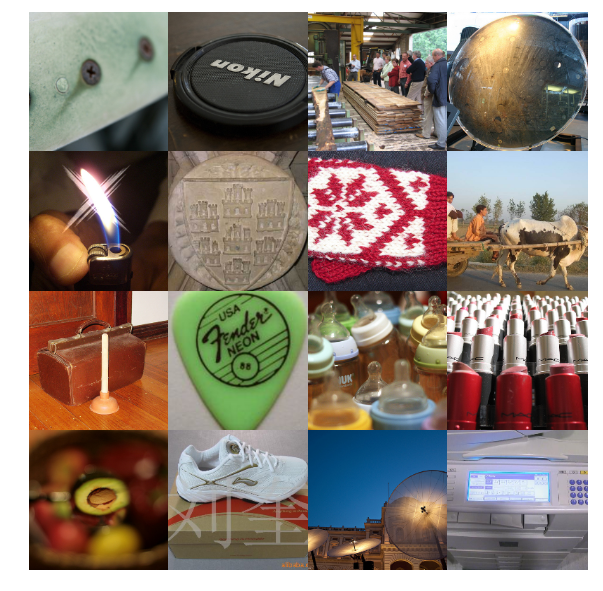

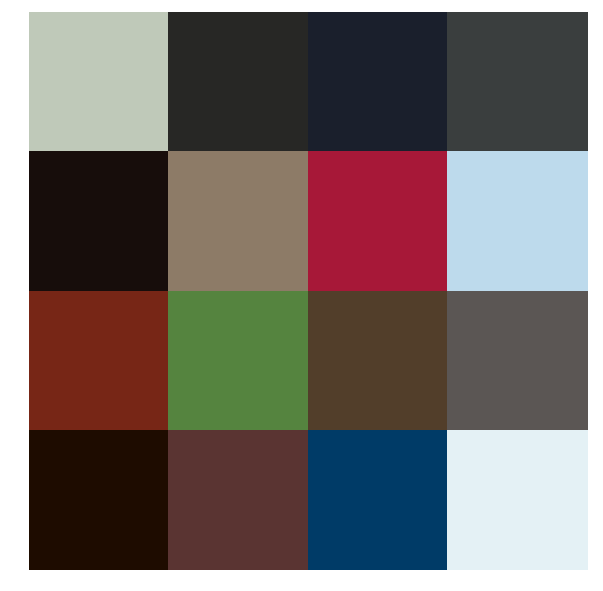

In [8]:
from os import listdir

img_dir = 'images/'
imgs = [img_dir + f for f in listdir(img_dir)]
result = []

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)

for idx, img in enumerate(imgs):
    img = crop(resize(Image.open(img), 200, 200), 200, center=True)
    result.append(get_color(img))
    plt.subplot(4,4,idx + 1)
    plt.imshow(np.array(img))
    plt.axis('off')
    
plt.figure(2)
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)


for idx, img in enumerate(result):
    img = Image.fromarray(img[np.newaxis, np.newaxis, :]).resize((200, 200), Image.NEAREST)
    plt.subplot(4,4,idx + 1)
    plt.imshow(np.array(img))
    plt.axis('off')
    